In [4]:
#### 1. Import libraries

import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib
from scipy.stats import skew
from IPython.display import display, HTML
from scipy.stats.stats import pearsonr
import os
import glob
%matplotlib inline


In [3]:
#### 2. Sanity check that the data exists
from subprocess import check_output
print(check_output(["ls", "Volean/Problem1"]).decode("utf8"))

data_1_1.csv
data_1_2.csv
data_1_3.csv
data_1_4.csv
data_1_5.csv
problem_def.pdf



In [57]:
##### 3. Load the data

#get a list of all the data files provided
data_files = glob.glob("Volean/Problem1/*csv")

# create a data frame using all five csv files
data_tot = pd.concat(map(pd.read_csv, data_files))

# just a check of the dimensions of the data frame and how first five rows look like
data_tot.shape
#data_tot.head()


(350, 2)

In [83]:
#### 4. Extract x and y
train1=pd.read_csv('Volean/Problem1/data_1_1.csv')
train2=pd.read_csv('Volean/Problem1/data_1_2.csv')
train3=pd.read_csv('Volean/Problem1/data_1_3.csv')
train4=pd.read_csv('Volean/Problem1/data_1_4.csv')
train5=pd.read_csv('Volean/Problem1/data_1_5.csv')

#train1.shape
dfs1 = np.split(train1, 2)
train1_1 = dfs1[0]
train1_2 = dfs1[1]

dfs2 = np.split(train2, 2)
train2_1 = dfs2[0]
train2_2 = dfs2[1]

X = data_tot[['x']]
y = data_tot[['y']]



In [78]:
corr = data_tot.corr()
print corr


          x         y
x  1.000000  0.171117
y  0.171117  1.000000


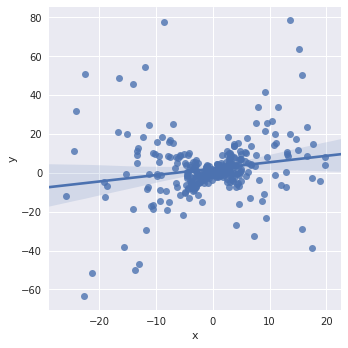

In [86]:
sns.lmplot(x='x', y='y', data=data_tot)


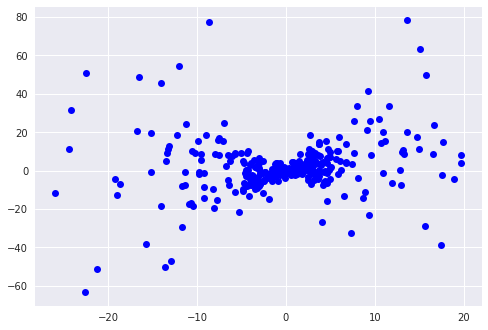

In [109]:
plt.plot(X, y, 'bo')

In [123]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.mstats.linregress(X, y)
print slope
print intercept
print r_value
print p_value
print std_err


0.32934967435
2.11913586553
0.171117234675
0.00131085601649
0.101653094552


In [ ]:
xp = np.linspace(-20, 20, 100)
_ = plt.plot(X, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2,2)
plt.show()

In [96]:
### 5. Split data into test and train sets
from sklearn.model_selection import train_test_split
X_test, X_train, y_test, y_train = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=0)


In [101]:
### 6. Do the fitting of the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.01371161020814371

In [98]:
y_pred = model.predict(X_test)

In [102]:
### 6. Calculating parameters and checking that they make sense

model.coef_

array([[ 0.28504147]])

In [104]:

model.intercept_

array([ 3.53285097])

In [100]:
### 7. Evaluation of the fit
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.01371161020814371

In [52]:
from sklearn.model_selection import LeaveOneOut

X = [train1_1, train1_2, train2_1, train2_2, train3, train4, train5]
loo = LeaveOneOut()
for train, test in loo.split(all_data):
    print("%s %s" % (train, test))
    X_train, X_test, y_train, y_test = X[train], X[test], y[train], y[test]
    #print type(X_train)

[1 2 3 4 5 6] [0]


TypeError: only integer scalar arrays can be converted to a scalar index

In [45]:

y

,y
0,-0.553881
1,-2.904648
2,4.404360
3,-27.008035
4,6.456532
5,3.000508
6,15.253354
7,2.165869
8,1.325088
9,-8.181288
